<a href="https://colab.research.google.com/github/priyarameshd/DecisionTree/blob/main/DecisionTree_companydata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import  GridSearchCV
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.metrics import accuracy_score,confusion_matrix
import seaborn as sb

Problem Statement:
A cloth manufacturing company is interested to know about the segment or attributes causes high sale.
Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  


In [ ]:
company_df = pd.read_csv('Company_Data.csv')

### EDA and Visualization

In [ ]:
company_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [ ]:
company_df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [ ]:
company_df.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [ ]:
company_df.corr()

<ipython-input-165-75a4887425c6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  company_df.corr()


,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.231815,-0.051955
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000


<Axes: >

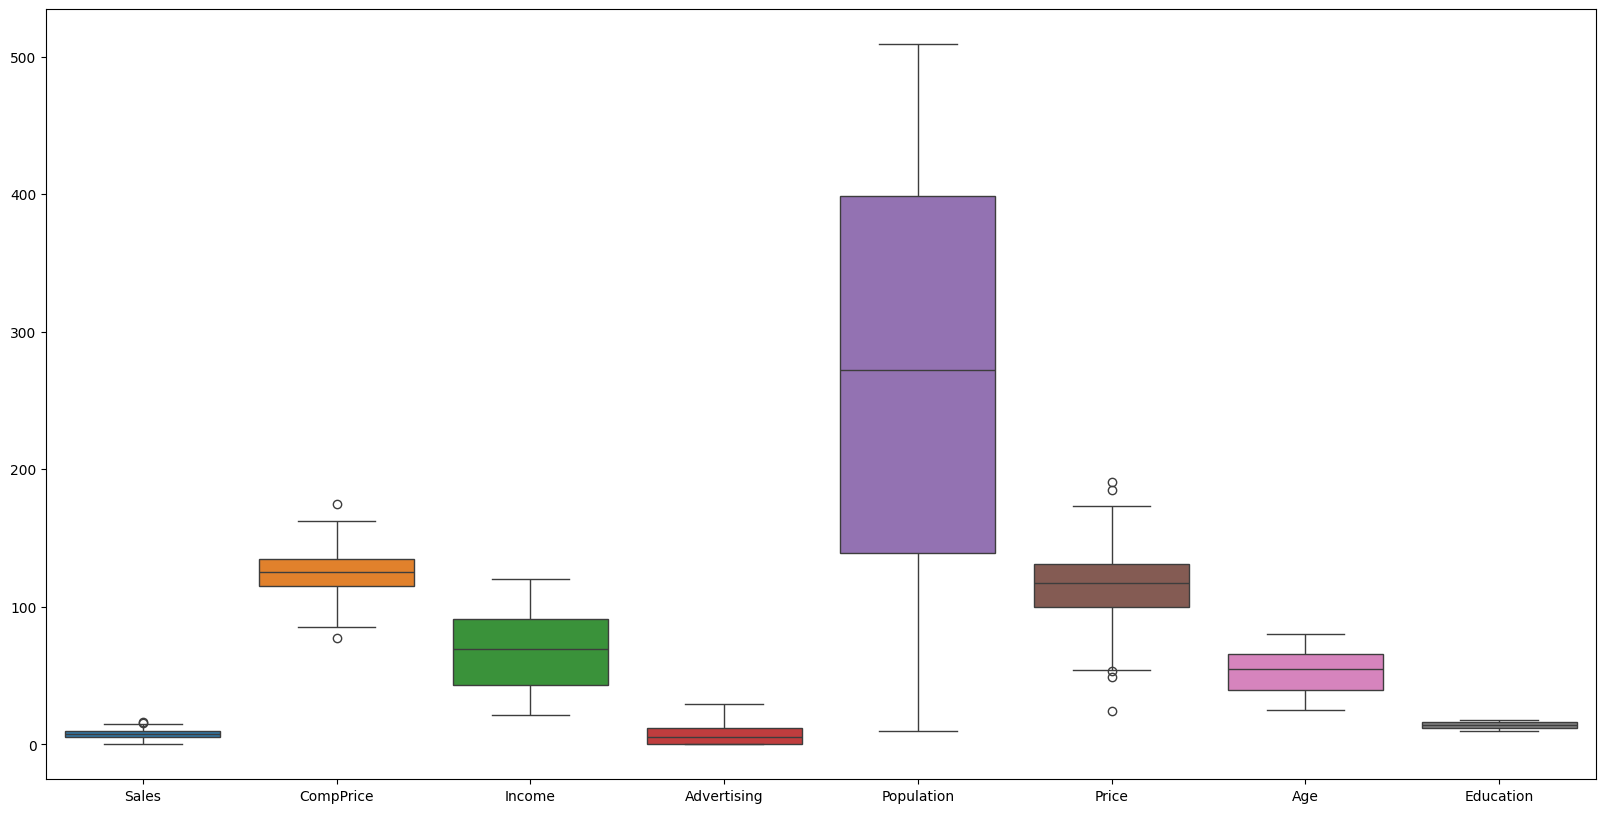

In [ ]:
plt.figure(figsize=(20,10))
sb.boxplot(data=company_df)

<ipython-input-167-2a46cf4b1b17>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(company_df[param], color = "purple", hist_kws={"rwidth":0.80, 'alpha':1.0})


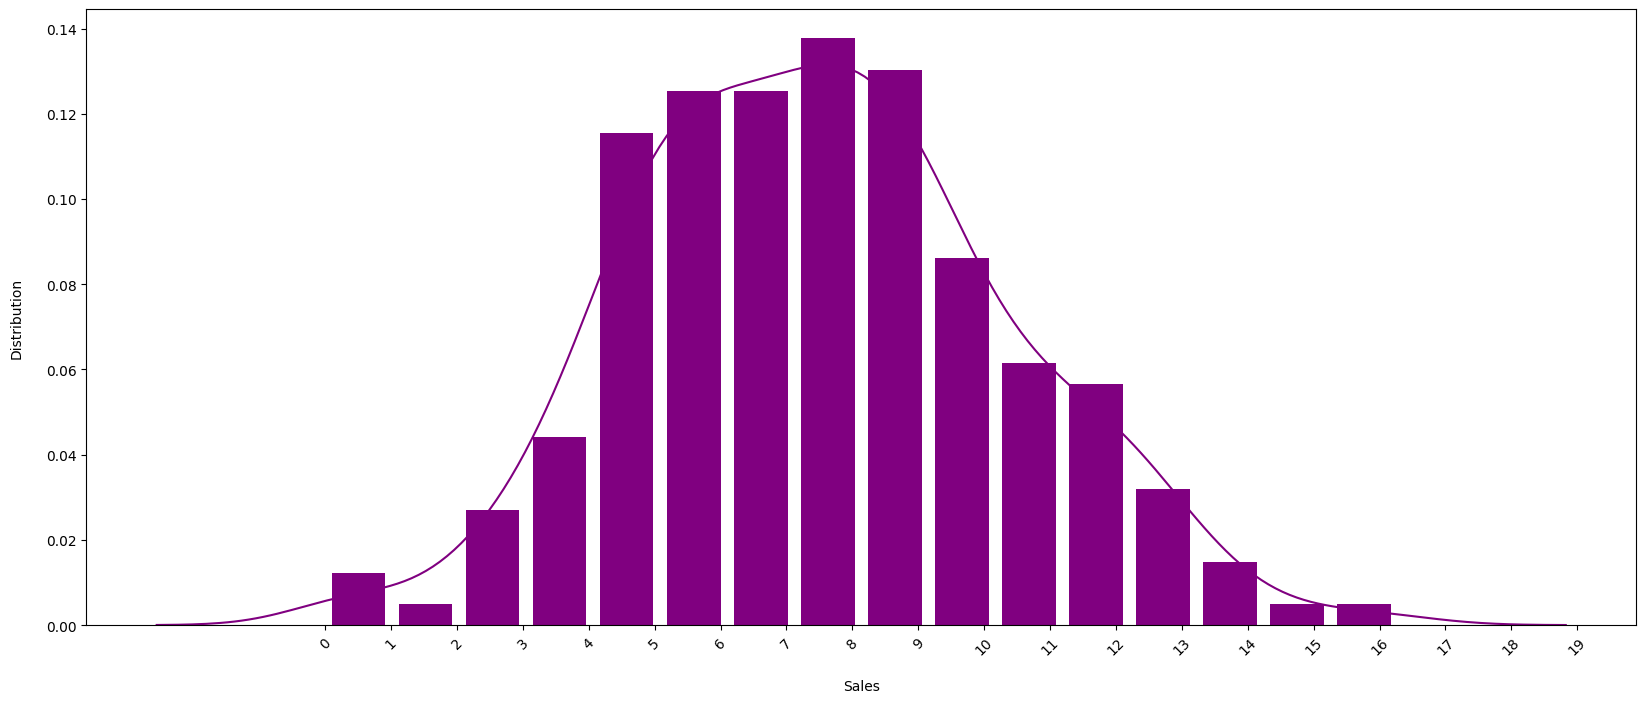

In [ ]:
def distplot(param):
    plt.figure(figsize=(20,8))
    sb.distplot(company_df[param], color = "purple", hist_kws={"rwidth":0.80, 'alpha':1.0})
    plt.xticks(np.arange(0,20,1),rotation=45)
    plt.xlabel('\n'+param)
    plt.ylabel('Distribution\n')
    plt.show()
distplot("Sales")

In [ ]:
company_df['high_sales'] = pd.cut(company_df.Sales, bins=[-1,7.4,17],
                      labels=['Low','High'])
company_df.head(5)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,high_sales
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,High
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,High
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,High
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,Low
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,Low


In [ ]:
company_df=pd.get_dummies(company_df,columns=['ShelveLoc','Urban','US'], drop_first=True)

In [ ]:
company_df['high_sales'].value_counts()

High    206
Low     194
Name: high_sales, dtype: int64

In [ ]:
label_encoder = preprocessing.LabelEncoder()
company_df['high_sales'] =  label_encoder.fit_transform(company_df['high_sales'])

In [ ]:
company_df.drop(columns=['Sales'],axis=1,inplace=True)

In [ ]:
company_df.head(2)

,CompPrice,Income,Advertising,Population,Price,Age,Education,high_sales,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes,US_Yes
0,138,73,11,276,120,42,17,0,0,0,1,1
1,111,48,16,260,83,65,10,0,1,0,1,1


Training the model

In [ ]:
x = company_df.drop(columns=['high_sales'],axis=1)
y = company_df['high_sales']

In [ ]:
y

0      0
1      0
2      0
3      1
4      1
      ..
395    0
396    1
397    0
398    1
399    0
Name: high_sales, Length: 400, dtype: int64

In [ ]:
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [ ]:
model = DecisionTreeClassifier(criterion = 'entropy',random_state=42,max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

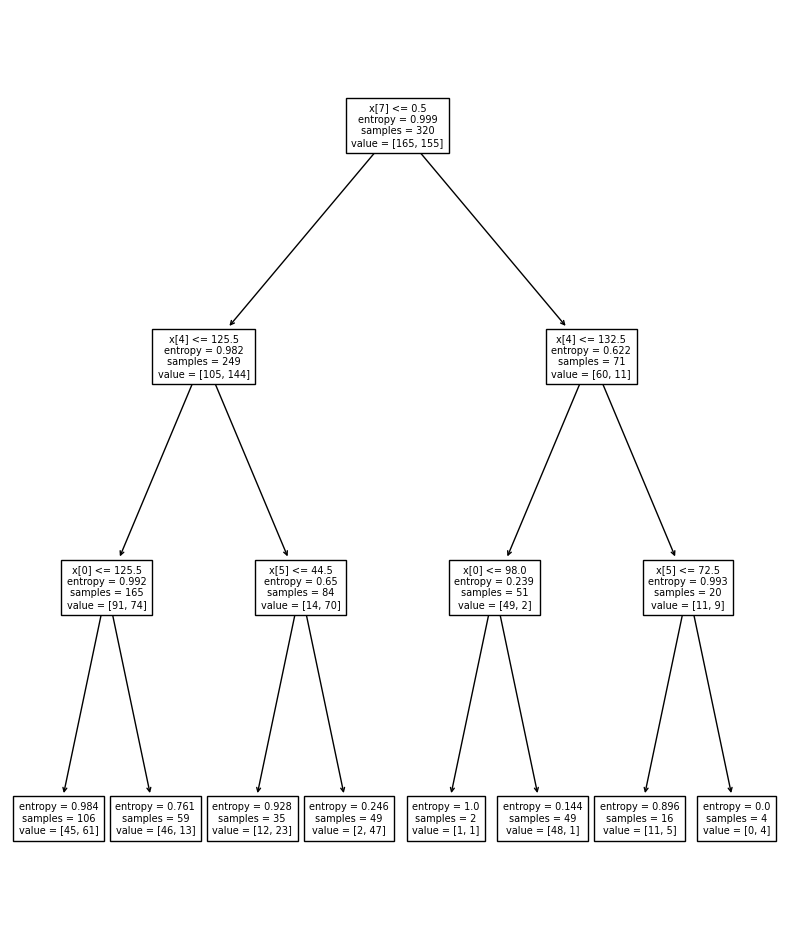

In [ ]:
plt.figure(figsize=(10,12))
tree.plot_tree(model,fontsize=7);

In [ ]:
x.columns

Index(['CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age',
       'Education', 'ShelveLoc_Good', 'ShelveLoc_Medium', 'Urban_Yes',
       'US_Yes'],
      dtype='object')

In [ ]:
cnames = company_df.high_sales.unique().tolist()
col_names = [str(c) for c in cnames]

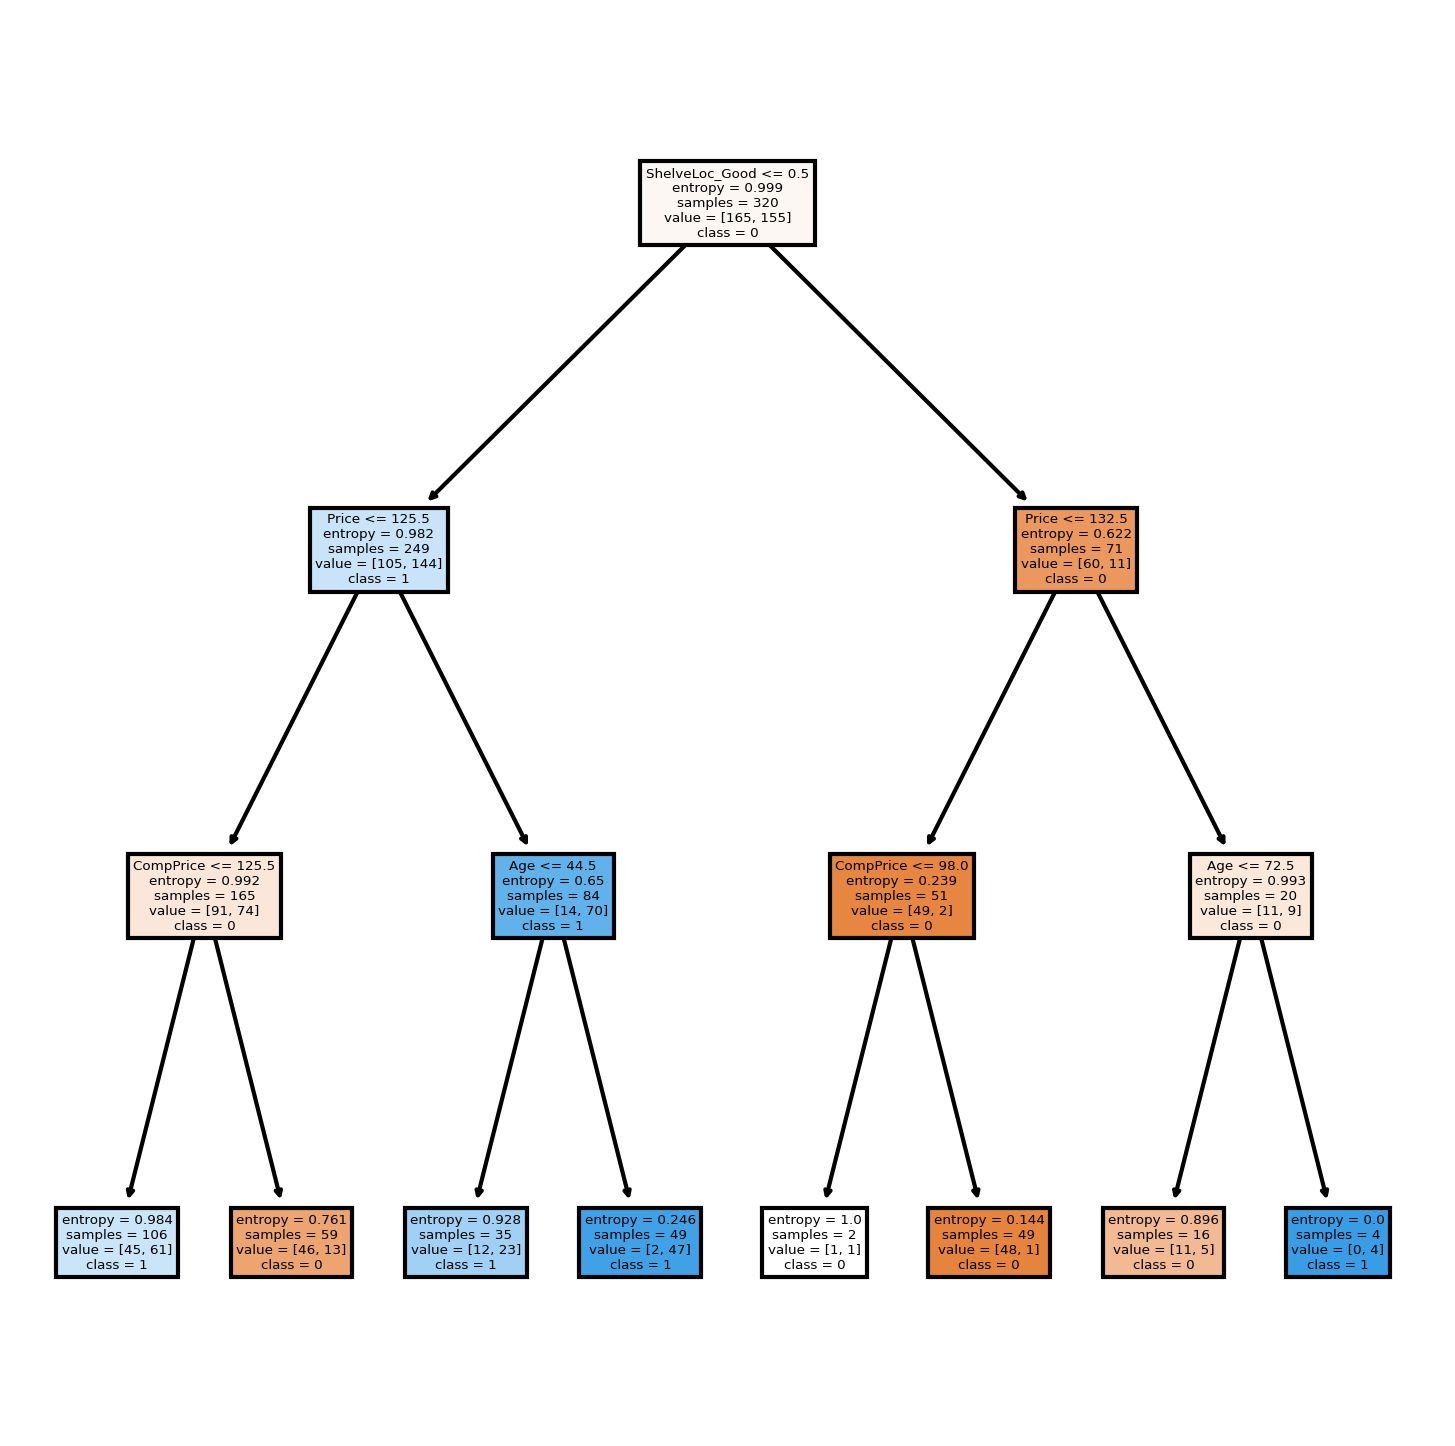

In [ ]:
fn=x.columns


fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (6,6), dpi=300)
tree.plot_tree(model,
               feature_names = fn,
               class_names=col_names,
               filled = True);


In [ ]:
text = tree.export_text(model,max_depth=3)

In [ ]:
model.feature_importances_

array([0.17254418, 0.        , 0.        , 0.        , 0.37352601,
       0.15186237, 0.        , 0.30206745, 0.        , 0.        ,
       0.        ])

In [ ]:
import pandas as pd
feature_imp = pd.Series(model.feature_importances_,index=fn).sort_values(ascending=False)
feature_imp

Price               0.373526
ShelveLoc_Good      0.302067
CompPrice           0.172544
Age                 0.151862
Income              0.000000
Advertising         0.000000
Population          0.000000
Education           0.000000
ShelveLoc_Medium    0.000000
Urban_Yes           0.000000
US_Yes              0.000000
dtype: float64

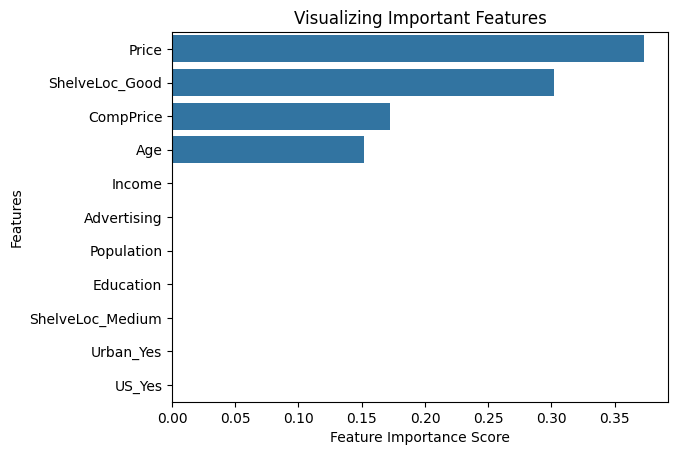

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [ ]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set
pd.Series(preds).value_counts() # getting the count of each category

1    51
0    29
dtype: int64

In [ ]:
preds

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1])

In [ ]:
pd.crosstab(y_test,preds)

col_0,0,1
high_sales,,
0,21,20
1,8,31


In [ ]:
np.mean(preds==y_test)

0.65


### Building Decision Tree Classifier (CART) using Gini Criteria

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [ ]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [ ]:
#Prediction and computing the accuracy
pred=model.predict(x_test)
np.mean(preds==y_test)

0.65

In [ ]:
model.feature_importances_

array([0.17254418, 0.        , 0.        , 0.        , 0.37352601,
       0.15186237, 0.        , 0.30206745, 0.        , 0.        ,
       0.        ])

### Decision Tree Regression Example

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
model = DecisionTreeRegressor(max_depth = 3)
model.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [ ]:
model.score(x_test,y_test)

0.29831018563360956

In [ ]:
#Find the training accuracy
model.score(x_train, y_train)

0.37509105547425015

### Pre pruning
Stoping tthe decision tree on early stage using max_depth,min_samples etc

In [ ]:
params = {'max_depth': [2,4,6,8,10,12],
         'min_samples_split': [2,3,4],
         'min_samples_leaf': [1,2]}

clf = tree.DecisionTreeClassifier()
gcv = GridSearchCV(estimator=clf,param_grid=params)
gcv.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 4, 6, 8, 10, 12],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3, 4]})

In [ ]:
def plot_confusionmatrix(y_train_pred,y_train,dom):
    classes = [0,1,2]
    print(f'{dom} Confusion matrix')
    cf = confusion_matrix(y_train_pred,y_train)
    sns.heatmap(cf,annot=True,yticklabels=classes
               ,xticklabels=classes,cmap='Blues', fmt='g')
    plt.tight_layout()
    plt.show()

Train score 0.99375
Test score 0.775
Train Confusion matrix


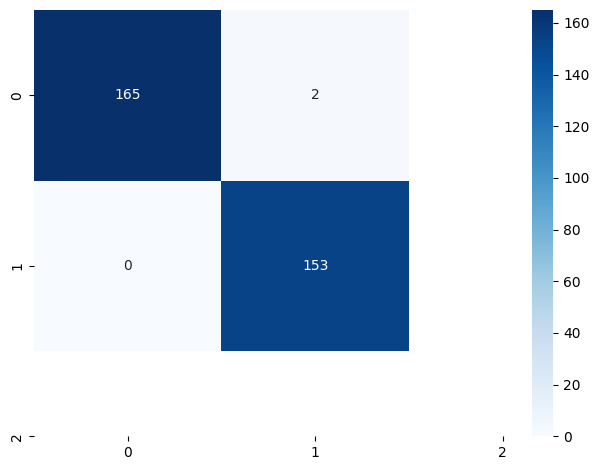

Test Confusion matrix


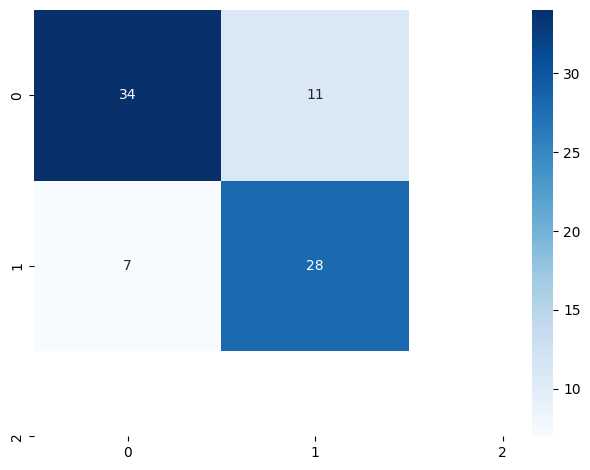

In [ ]:
model = gcv.best_estimator_
model.fit(x_train,y_train)
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')
plot_confusionmatrix(y_train_pred,y_train,dom='Train')
plot_confusionmatrix(y_test_pred,y_test,dom='Test')

There is an improvement in test accuracy but still needs to be improved.

### Post Pruning

In [ ]:
path = clf.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print(ccp_alphas)

[0.         0.00277778 0.00295455 0.00296053 0.00297619 0.00307018
 0.00416667 0.00416667 0.00444444 0.0046875  0.0046875  0.00511364
 0.00520833 0.005625   0.005625   0.00571877 0.00606061 0.00606618
 0.00683145 0.0075     0.0078125  0.00902273 0.00954556 0.01080882
 0.01537132 0.015625   0.01574356 0.01704918 0.02278974 0.02305028
 0.02389706 0.05480546 0.06189505]


In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(x_train, y_train)
    clfs.append(clf)



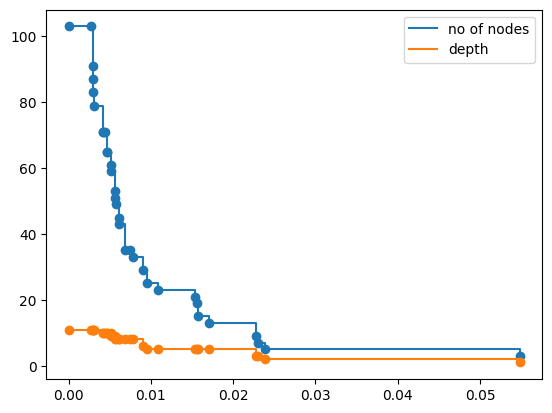

In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
plt.scatter(ccp_alphas,node_counts)
plt.scatter(ccp_alphas,depth)
plt.plot(ccp_alphas,node_counts,label='no of nodes',drawstyle="steps-post")
plt.plot(ccp_alphas,depth,label='depth',drawstyle="steps-post")
plt.legend()
plt.show()

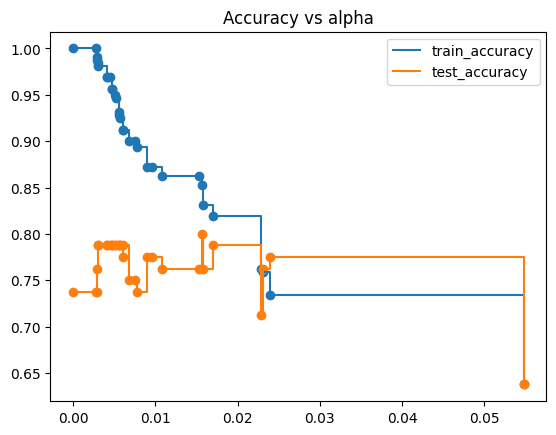

In [ ]:
train_acc = []
test_acc = []
for c in clfs:
    y_train_pred = c.predict(x_train)
    y_test_pred = c.predict(x_test)
    train_acc.append(accuracy_score(y_train_pred,y_train))
    test_acc.append(accuracy_score(y_test_pred,y_test))

plt.scatter(ccp_alphas,train_acc)
plt.scatter(ccp_alphas,test_acc)
plt.plot(ccp_alphas,train_acc,label='train_accuracy',drawstyle="steps-post")
plt.plot(ccp_alphas,test_acc,label='test_accuracy',drawstyle="steps-post")
plt.legend()
plt.title('Accuracy vs alpha')
plt.show()

Train score 0.81875
Test score 0.7875
Train Confusion matrix


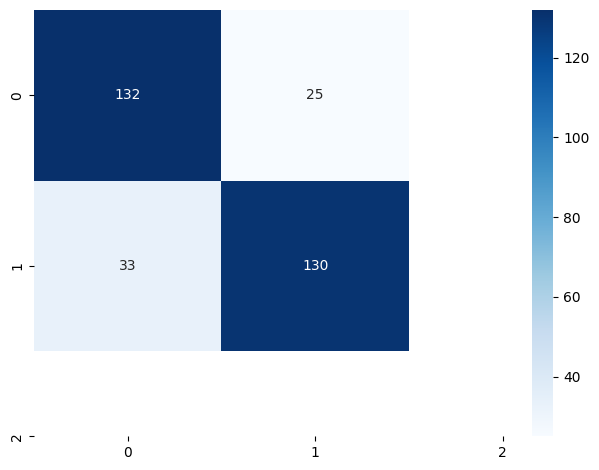

Test Confusion matrix


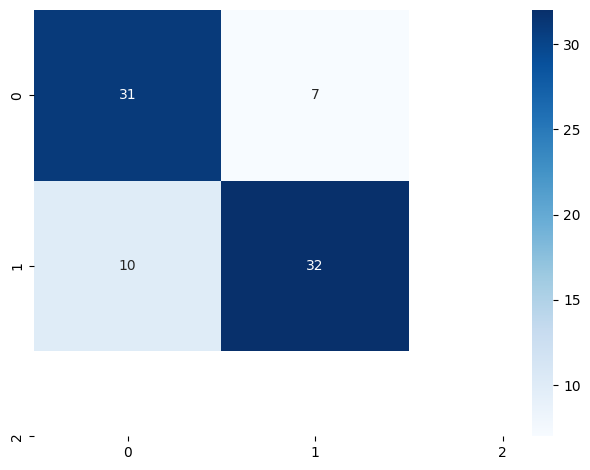

In [ ]:
clf_ = tree.DecisionTreeClassifier(random_state=0,ccp_alpha=0.020)
clf_.fit(x_train,y_train)
y_train_pred = clf_.predict(x_train)
y_test_pred = clf_.predict(x_test)

print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')
plot_confusionmatrix(y_train_pred,y_train,dom='Train')
plot_confusionmatrix(y_test_pred,y_test,dom='Test')

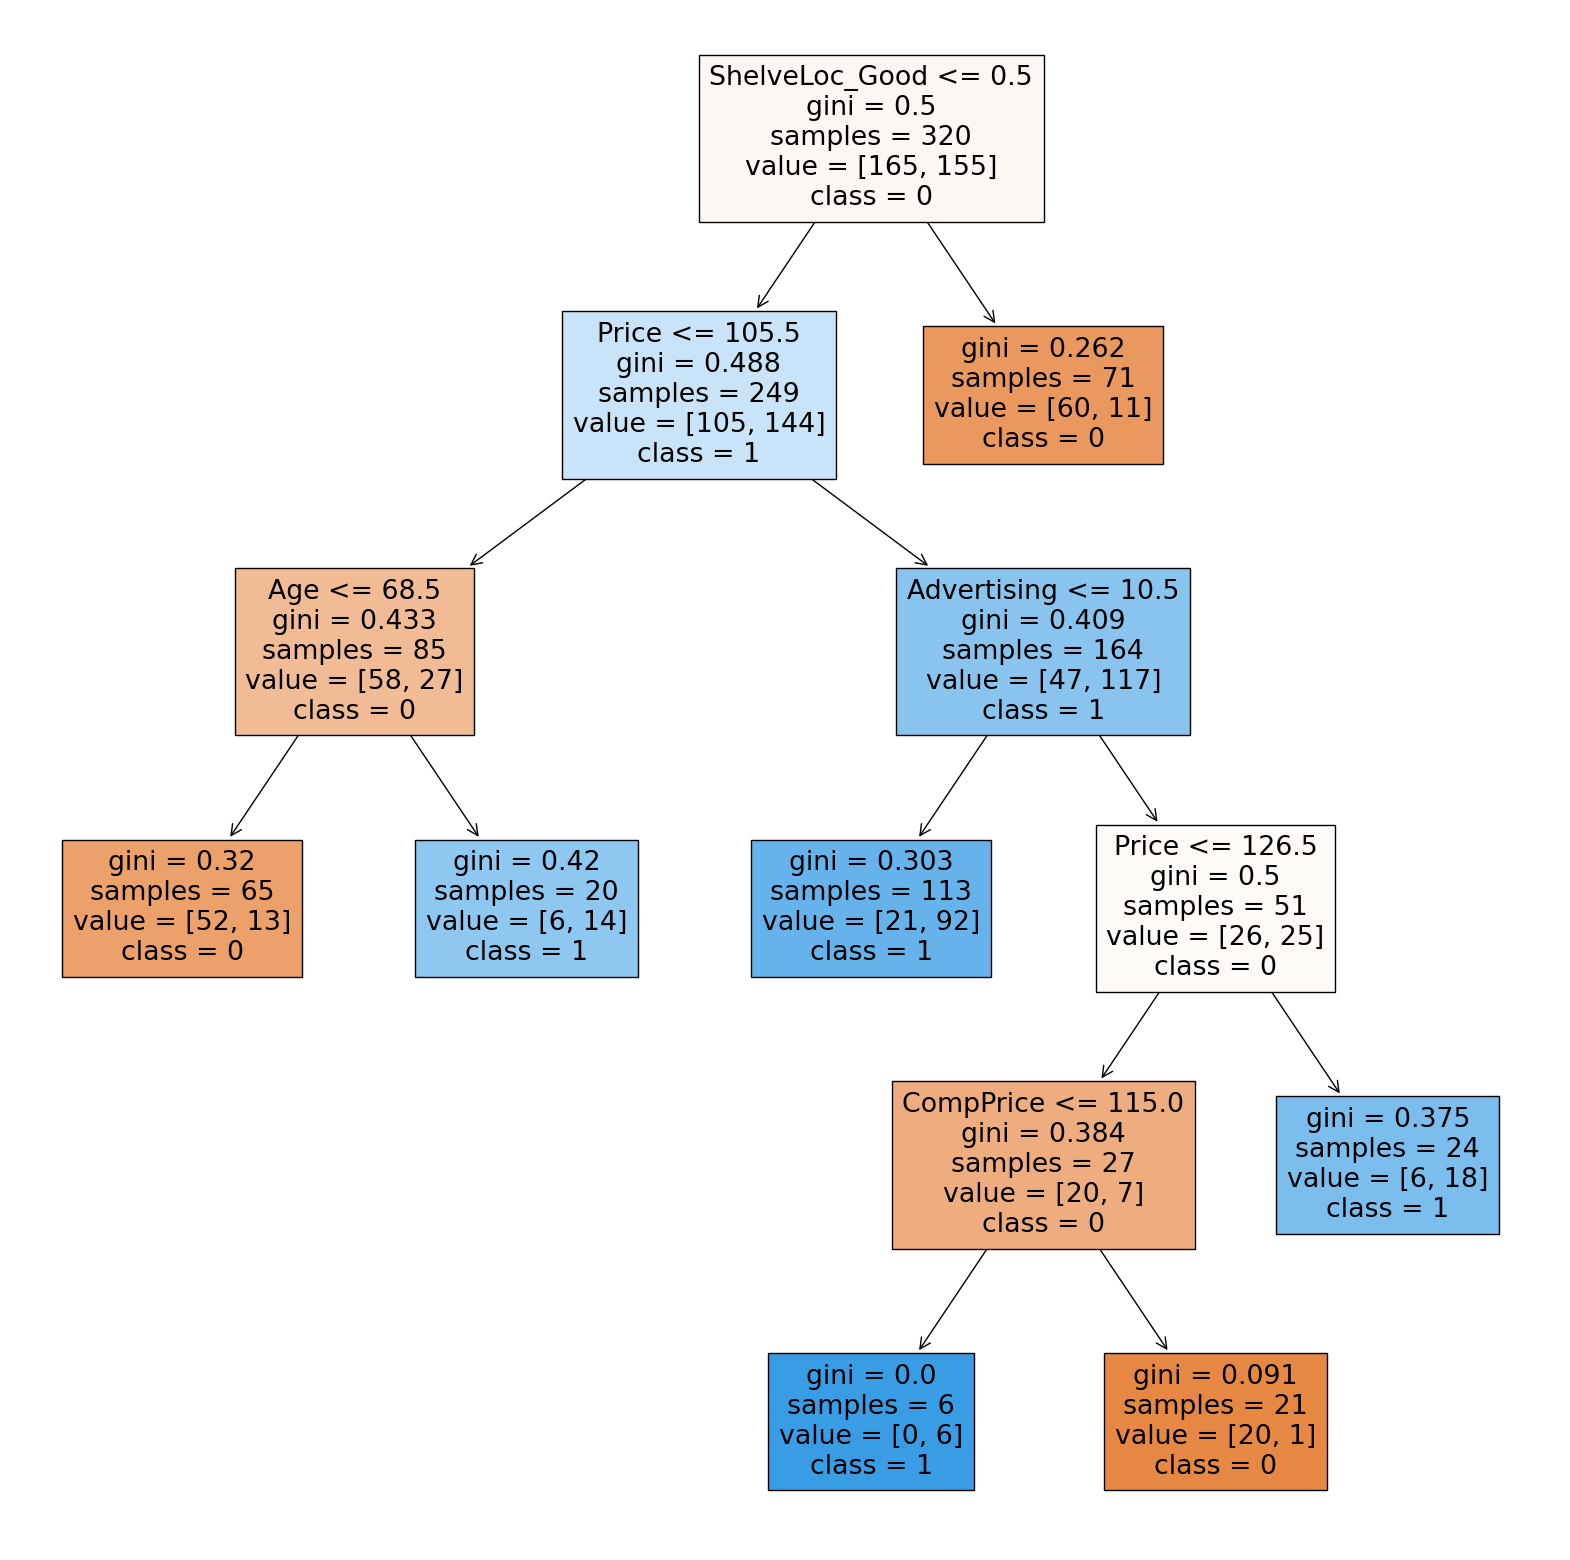

In [ ]:
plt.figure(figsize=(20,20))
features = x.columns
classes = ['0','1']
tree.plot_tree(clf_,feature_names=features,class_names=classes,filled=True)
plt.show()

There is an improvement in accuracy an decision tree is better.
From this we can conclude that ShelveLoc_Good and price are an important features.